# Entregable 2: Respuestas - Preguntas Datos Oficiales

## Lectura de archivo: Producción de Crudo de 2018 a 2020

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Leer archivo .xlsx con datos de produccion: 2018 a 2020
df_2018_2020 = pd.read_excel('Datos_salida/Produccion_Fiscalizada_Crudo_DatosOficiales_2018-2020.xlsx')

In [2]:
# produccion de 2018 a 2020
df_2018_2020.head()

,departamento,municipio,operadora,contrato,campo,año,mes,produccion
0,ANTIOQUIA,PUERTO NARE,ECOPETROL S.A.,TECA COCORNA,AREA TECA-COCORNA,2020,ene,1765.84
1,ANTIOQUIA,PUERTO TRIUNFO,ECOPETROL S.A.,TECA COCORNA,AREA TECA-COCORNA,2020,ene,119.70
2,ANTIOQUIA,YONDO,ECOPETROL S.A.,MAGDALENA MEDIO,CASABE,2020,ene,11636.58
3,ANTIOQUIA,YONDO,ECOPETROL S.A.,MAGDALENA MEDIO,CASABE SUR,2020,ene,1852.60
4,ANTIOQUIA,PUERTO NARE,MANSAROVAR ENERGY COLOMBIA LTD,NARE,NARE SUR,2020,ene,187.33


## Pregunta 1

In [3]:
# Ordenar Produccion por Campo (2018 a 2020)
df_2018_2020.groupby(['campo','año']).sum()

produccion
campo    año               
ABANICO  2018   7026.353072
         2019   5597.890000
         2020   3823.370000
ABARCO   2018  43877.241182
         2019  37827.370000
...                     ...
ZOE      2019     29.600000
         2020     12.840000
ZOPILOTE 2018  16273.109197
         2019  15350.670000
         2020   7260.920000

[1226 rows x 1 columns]

In [4]:
# Pregunta 1
# Ordenar Campos por Produccion (mayor a menor) en el 2020
q1 = df_2018_2020.loc[df_2018_2020['año'] == 2020].groupby(['campo','año']).sum().sort_values('produccion',ascending = False)

print('TOP 5 Campos con mayor producción durante 2020:')
q1.head(5)

TOP 5 Campos con mayor producción durante 2020:


,,produccion
campo,año,
RUBIALES,2020,857001.07
CASTILLA,2020,537068.14
CHICHIMENE,2020,388023.81
CASTILLA NORTE,2020,380005.77
QUIFA,2020,304783.67


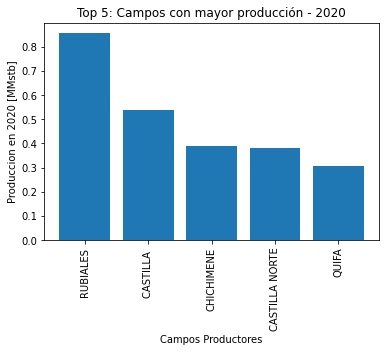

In [5]:
# Grafica - Pregunta 1:
top = 5 # Top 5 - Campos Productores en 2020

# Obtener nombre de campos y valores de produccion para graficar:
query1 = df_2018_2020.loc[df_2018_2020['año'] == 2020].groupby('campo').sum().sort_values('produccion',ascending = False)

# Grafica
plt.bar(query1.index[0:top],query1['produccion'].values[0:top]/1E6)
plt.xticks(query1.index[0:top],fontsize = 10, rotation = 'vertical')
plt.xlabel('Campos Productores')
plt.ylabel('Produccion en 2020 [MMstb]')
plt.title('Top 5: Campos con mayor producción - 2020')
plt.show()

## Pregunta 2

In [6]:
# Ordenar por Departamento
df_2018_2020.loc[(df_2018_2020['año'] == 2018) & (df_2018_2020['departamento'] == 'CASANARE')].groupby('departamento').size().sort_values()

departamento
CASANARE    2112
dtype: int64

In [7]:
# Agrupar por Operadora (en Casanare en 2018)
query2 = df_2018_2020.loc[(df_2018_2020['año'] == 2018) & (df_2018_2020['departamento'] == 'CASANARE')].groupby(['operadora','año']).sum()
query2.head(10)

,,produccion
operadora,año,
CANACOL ENERGY COLOMBIA SAS,2018,20995.926375
CARRAO ENERGY S.A. SUCURSAL COLOMIBA,2018,3130.220968
CEPSA COLOMBIA S.A.,2018,36395.023511
CNE OIL & GAS S.A.S.,2018,8095.347237
COLOMBIA ENERGY DEVELOPMENT CO,2018,26626.991211
DCX S.A.S.,2018,107.803376
ECOPETROL S.A.,2018,205694.357535
EMERALD ENERGY PLC SUCURSAL COLOMBIA,2018,22116.701907
EQUION ENERGÍA LIMITED,2018,485507.624683


In [8]:
# Ordenar Operadoras por numero de CAMPOS operados en CASANARE
num_campos = 5 # numero minimo de CAMPOS donde opera
operadoras = df_2018_2020.loc[(df_2018_2020['año'] == 2018) & (df_2018_2020['departamento'] == 'CASANARE')].groupby(['operadora','campo','año']).sum()
lista_operadoras_ordenadas = operadoras.groupby('operadora').size().sort_values(ascending = False)
top_operadoras = lista_operadoras_ordenadas[lista_operadoras_ordenadas > num_campos]


In [9]:
#Numero de Companias con Produccion en mas de 5 campos en Casanare 
print('Número de Compañías con producción en más de 5 campos en Casanare (año 2018):', top_operadoras.count())
print('\n')
print(top_operadoras)

Número de Compañías con producción en más de 5 campos en Casanare (año 2018): 8


operadora
PERENCO COLOMBIA LIMITED                            34
Frontera Energy Colombia Corp Sucursal Colombia     34
GEOPARK COLOMBIA S.A.S.                             20
ECOPETROL S.A.                                       9
PAREX RESOURCES COLOMBIA LTD. SUCURSAL               7
CEPSA COLOMBIA S.A.                                  6
COLOMBIA ENERGY DEVELOPMENT CO                       6
NEW GRANADA ENERGY CORPORATION SUCURSAL COLOMBIA     6
dtype: int64


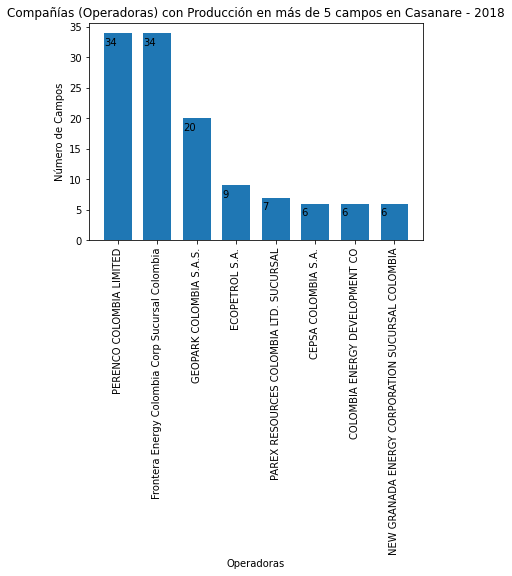

In [10]:
# Grafica - Pregunta 2:
num_campos = 5 # numero minimo de CAMPOS donde opera

x = top_operadoras.index # Companias (Operadoras)
y = top_operadoras.values # Numero de CAMPOS donde Operan

bars = plt.bar(x, height = y, width = 0.7)
xlocs, xlabs = plt.xticks()
xlocs=[i for i in x]
xlabs=[i for i in x]
plt.xticks(xlocs, xlabs)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval - 2, yval, fontsize = 10)

plt.xticks(top_operadoras.index,fontsize = 10, rotation = 'vertical')
plt.xlabel('Operadoras')
plt.ylabel('Número de Campos')
plt.title('Compañías (Operadoras) con Producción en más de 5 campos en Casanare - 2018')
plt.show()

## Pregunta 3

In [11]:
# Ordenar (de mayor a menor produccion) Contratos 
df_2018_2020.groupby(['contrato','año']).sum().sort_values('produccion',ascending = False)

produccion
contrato  año               
CUBARRAL  2019  2.197917e+06
          2018  2.177189e+06
          2020  1.460827e+06
RUBIALES  2018  1.433612e+06
          2019  1.431907e+06
...                      ...
CARBONERA 2020  4.800000e-01
VMM-32    2018  4.376774e-01
VIM-8     2018  2.719677e-01
VMM 12    2018  9.677419e-02
GUASIMO   2020  3.000000e-02

[485 rows x 1 columns]

In [12]:
# Pregunta 3
# Ordenar Contratos por Produccion (mayor a menor) en el 2018
q3 = df_2018_2020.loc[df_2018_2020['año'] == 2018].groupby(['contrato','año']).sum().sort_values('produccion',ascending = False).head(5)
q3 /= 1e6

print('TOP 5 Contratos con más alta producción [MMstb] en 2018:')
q3

TOP 5 Contratos con más alta producción [MMstb] en 2018:


,,produccion
contrato,año,
CUBARRAL,2018,2.177189
RUBIALES,2018,1.433612
LLA 34,2018,0.725580
QUIFA,2018,0.554438
LA CIRA INFANTAS,2018,0.542415


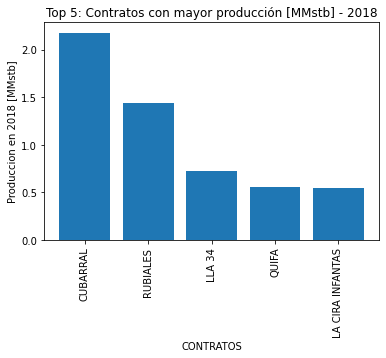

In [13]:
# Grafica - Pregunta 3:
top = 5 # Top 5 - CONTRATOS Productores en 2020

# Obtener nombre de contratos y valores de produccion para graficar:
query3 = df_2018_2020.loc[df_2018_2020['año'] == 2018].groupby(['contrato']).sum().sort_values('produccion',ascending = False)

# Grafica
plt.bar(query3.index[0:top],query3['produccion'].values[0:top]/1E6)
plt.xticks(query3.index[0:top],fontsize = 10, rotation = 'vertical')
plt.xlabel('CONTRATOS')
plt.ylabel('Produccion en 2018 [MMstb]')
plt.title('Top 5: Contratos con mayor producción [MMstb] - 2018')
plt.show()

## Pregunta 4

In [14]:
# Ordenar (de mayor a menor produccion) Operadoras  
df_2018_2020.groupby(['operadora','año']).sum().sort_values('produccion',ascending = False)

produccion
operadora                                          año               
ECOPETROL S.A.                                     2019  5.735906e+06
                                                   2018  5.633033e+06
                                                   2020  3.763143e+06
Frontera Energy Colombia Corp Sucursal Colombia    2019  9.631013e+05
                                                   2018  9.102311e+05
...                                                               ...
GEOPRODUCTION OIL AND GAS COMPANY OF COLOMBIA      2019  3.010000e+00
                                                   2020  2.270000e+00
LAGOSUR PETROLEUM COLOMBIA INC SUCURSAL COLOMBIA   2018  1.769355e+00
WATTLE PETROLEUM COMPANY S.A.S                     2020  4.800000e-01
INGENIERIA CONSTRUCCIONES Y EQUIPOS CONEQUIPOS ... 2018  9.677419e-02

[127 rows x 1 columns]

In [15]:
# Pregunta 4
# Ordenar OPERADORAS por Produccion (mayor a menor) en Agosto (2019)
query4 = df_2018_2020.loc[(df_2018_2020['año'] == 2019) & (df_2018_2020['mes'] == 'ago' )].groupby('operadora').sum().sort_values('produccion',ascending = False)

In [16]:
print('Top 10 Operadoras con más alta producción en Agosto - 2019:')
print('\n')
print(query4.head(10)['produccion'])

Top 10 Operadoras con más alta producción en Agosto - 2019:


operadora
ECOPETROL S.A.                                     473986.41
Frontera Energy Colombia Corp Sucursal Colombia     81441.68
GEOPARK COLOMBIA S.A.S.                             69154.42
OCCIDENTAL DE COLOMBIA LLC                          53299.12
EQUION ENERGÍA LIMITED                              34950.01
GRAN TIERRA ENERGY COLOMBIA LTD                     29555.20
MANSAROVAR ENERGY COLOMBIA LTD                      25256.75
HOCOL S.A.                                          19614.02
PAREX RESOURCES COLOMBIA LTD. SUCURSAL              15727.97
CEPSA COLOMBIA S.A.                                 12702.09
Name: produccion, dtype: float64


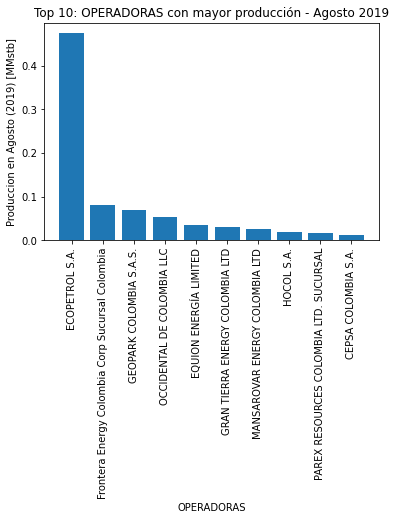

In [17]:
# Grafica - Pregunta 4:
top = 10 # Top 10 - OPERADORAS por produccion en Agosto, 2019

plt.bar(query4.index[0:top],query4['produccion'].values[0:top]/1E6)

plt.xticks(query4.index[0:top],fontsize = 10, rotation = 'vertical')
plt.xlabel('OPERADORAS')
plt.ylabel('Produccion en Agosto (2019) [MMstb]')
plt.title('Top 10: OPERADORAS con mayor producción - Agosto 2019')
plt.show()

## Pregunta 5

In [18]:
# Calcular produccion Total por TRIMESTRES
q5_t1 = df_2018_2020.loc[(df_2018_2020['mes'] == 'ene') | (df_2018_2020['mes'] == 'feb' )| (df_2018_2020['mes'] == 'mar')].groupby('año',as_index = False).sum() # Trimestre 1
q5_t2 = df_2018_2020.loc[(df_2018_2020['mes'] == 'abr') | (df_2018_2020['mes'] == 'may' )| (df_2018_2020['mes'] == 'jun')].groupby('año',as_index = False).sum() # Trimestre 2

query5_t1_t2 = pd.concat([q5_t1, q5_t2['produccion']], axis=1)
query5_t1_t2.columns = ['año','Trimestre1','Trimestre2']
query5_t1_t2

,año,Trimestre1,Trimestre2
0,2018,2.540703e+06,2.594491e+06
1,2019,2.676538e+06,2.677717e+06
2,2020,2.619417e+06,2.258345e+06


In [19]:
query5_t1_t2.columns[1:]

Index(['Trimestre1', 'Trimestre2'], dtype='object')

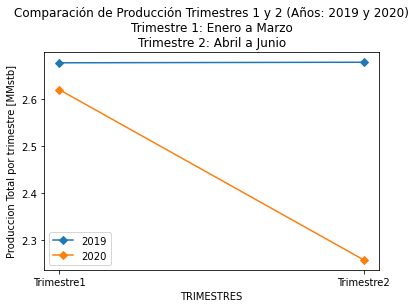

In [20]:
# Grafica: Pregunta 5
# Analisis Comparativo: Produccion en Trimestres 1 y 2 (2019 y 2020)

x = query5_t1_t2.columns[1:] # Trimestre 1 y 2
y19 = query5_t1_t2.iloc[1][1:]/1e6 # Produccion total [MMstb] por trimestre - 2019
y20 = query5_t1_t2.iloc[2][1:]/1e6 # Produccion total [MMstb] por trimestre - 2020

plt.plot(y19,marker = 'D', label = '2019')
plt.plot(y20,marker = 'D', label = '2020')
plt.xticks(x)
plt.legend()
plt.xlabel('TRIMESTRES')
plt.ylabel('Produccion Total por trimestre [MMstb]')
plt.title('Comparación de Producción Trimestres 1 y 2 (Años: 2019 y 2020)\nTrimestre 1: Enero a Marzo\nTrimestre 2: Abril a Junio')
plt.show()